# Linear Regression using Stats model

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Step1: Reading the data

In [2]:
data = pd.read_csv("advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


# Step 2: Training the model

In [6]:
# Create X and Y
X = data['TV'] # Capital X matches documentation of libraries like scikit-learn, TensorFlow, etc.
y = data['Sales']

In [7]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=100)
# with random_state You’ll always get the same 70% training and 30% test data split — every time you run the code.

- Statsmodel library doesn't include the constant c(intercept), it only include the coefficient of the predicted variable so we will add the constant to statsmodel library explicitly to train the model because we can't exclude the constant unless we are sure that it is zero. 

In [8]:
# training the model
X_train_sm =sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [9]:
# fitting the model,  Objective of OLS: Find β values that minimize the total squared error between predicted and actual values:
lr = sm.OLS(y_train, X_train_sm) 
lr_model = lr.fit()               
lr_model.params                   

const    6.948683
TV       0.054546
dtype: float64

- Objective of OLS: Find β values that minimize the total squared error between predicted and actual values:
- OLS comes with rich statistical inference tools: p-values, R-squared, confidence intervals, F-statistics
- OLS provides the Best Linear Unbiased Estimator (BLUE) meaning among all linear unbiased estimators, OLS has the lowest variance.


- the above values are the constant and the coefficient of TV so the equation will be Sales = 6.91 + 0.05*TV  
- This is not the actual model unless we verify from summary that it is statistically significant.

In [10]:
lr_model.summary() # only Statsmodel give you such summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 30 Jun 2025   Prob (F-statistic):           1.52e-52
Time:                        20:06:25   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
y_train_pred = lr_model.predict(X_train_sm)

## Step 3: Residual analysis

- Linearity: the residuals should be randomly scattered around zero — no curve or trend.

- Homoscedasticity: Means the variance of residuals is constant across all levels of predicted values. Spread of residuals should be even — not getting wider or narrower like a cone.

- Histogram of Residuals (Normality): Assumes the residuals follow a normal distribution (bell curve). A smooth, bell-shaped curve (especially with the KDE line) suggests normality.


In [12]:
residuals_train = y_train - y_train_pred

### Residual Plot (Linearity & Homoscedasticity)

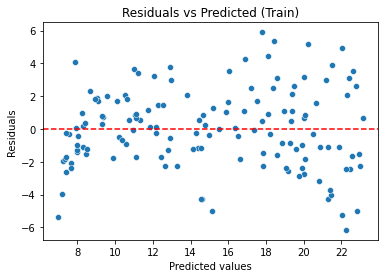

In [13]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_train_pred, y=residuals_train)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Train)")
plt.show()

### Histogram of Residuals (Normality)

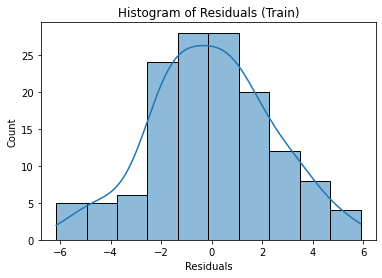

In [14]:
sns.histplot(residuals_train, kde=True)
plt.title("Histogram of Residuals (Train)")
plt.xlabel("Residuals")
plt.show()

In [15]:
r_train = r2_score(y_true=y_train, y_pred=y_train_pred)
r_train

0.8157933136480389

# Step 4: Predicting and evaluating on the test set

In [16]:
# add a contant/intercept to test
X_test_sm = sm.add_constant(X_test)

# Prediction on the test
y_test_pred = lr_model.predict(X_test_sm)

In [17]:
# evaluate the model, R-squared, on the test
r_test = r2_score(y_true=y_test, y_pred=y_test_pred)
r_test

0.7921031601245658

# Linear regression using SKlearn

In [18]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=100)

In [19]:
# reshape X_train to (n, 1) to ensure the input array has the correct 2D shape, especially for single feature input.
X_train_lm = X_train.values.reshape(-1, 1)
X_test_lm = X_test.values.reshape(-1, 1)

In [20]:
# Steps in sklearn model building:

# 1. create an object of linear regression
lm = LinearRegression()

# 2. fit the model
lm.fit(X_train_lm, y_train)

LinearRegression()

In [21]:
# 3. View coefficients
print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.9486832000013585


In [22]:
# make predictions 
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [23]:
# 4. evaluate the model
print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8157933136480388
0.792103160124566


# Multiple Regression 

### Step 1: Reading the Data

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [25]:
hous = pd.read_csv('Housing.csv')
hous.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [26]:
hous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


### Step 2: Data Preparation 

In [27]:
# # Encode binary variables
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
hous[varlist] = hous[varlist].apply(lambda x: x.map({'yes': 1, 'no': 0}))
hous[varlist].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0


### Dummy variable

In [28]:
# Creating dummy variable for furnishing status
status = pd.get_dummies(hous['furnishingstatus'], drop_first=True)
hous = pd.concat([hous, status], axis=1)
hous.drop('furnishingstatus', axis=1, inplace=True)
hous.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


### Scaling is important because we interpret coefficients.

In [29]:
# Scaling numeric variables
scaler = MinMaxScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
hous[num_vars] = scaler.fit_transform(hous[num_vars])

### Split into train and test set

In [30]:
df_train, df_test = train_test_split(hous, train_size=0.7, random_state=100)

### Step 3: Training the Model

In [31]:
# X_train, y_train
y_train = df_train.pop('price')
X_train = df_train

In [32]:
# 1. Add constant
X_train_sm = sm.add_constant(X_train)
#fit the model
lr_model = sm.OLS(y_train, X_train_sm).fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Mon, 30 Jun 2025   Prob (F-statistic):           8.83e-83
Time:                        20:06:52   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0162      0.021     

In [33]:
# Calculate VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

           Features       VIF
1          bedrooms  7.373262
4          mainroad  6.085302
0              area  5.010193
3           stories  2.701669
11   semi-furnished  2.187446
9           parking  2.121678
6          basement  2.014989
12      unfurnished  1.823967
8   airconditioning  1.771997
2         bathrooms  1.666097
10         prefarea  1.506383
5         guestroom  1.468821
7   hotwaterheating  1.135913


In [34]:
# Drop high VIF or high p-value variables and rebuild model
X_train = X_train.drop(['bedrooms', 'semi-furnished'], axis=1)
X_train_sm = sm.add_constant(X_train)
lr_model = sm.OLS(y_train, X_train_sm).fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Mon, 30 Jun 2025   Prob (F-statistic):           2.73e-84
Time:                        20:06:54   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0319      0.015     

In [35]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

           Features       VIF
3          mainroad  4.920987
0              area  4.842720
2           stories  2.226136
8           parking  2.104392
5          basement  1.872522
7   airconditioning  1.766005
1         bathrooms  1.609070
9          prefarea  1.502837
4         guestroom  1.462664
10      unfurnished  1.334898
6   hotwaterheating  1.125136


# Step 4: Residual Analysis

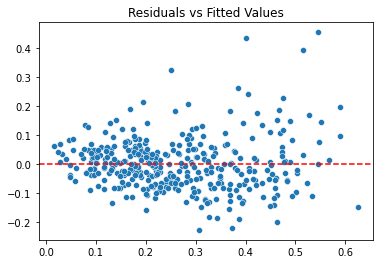

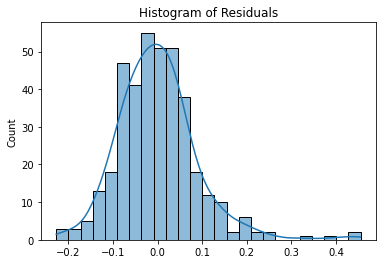

In [36]:
# Residual analysis
y_train_pred = lr_model.predict(X_train_sm)
res = y_train - y_train_pred
sns.scatterplot(x=y_train_pred, y=res)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.show()
sns.histplot(res, kde=True)
plt.title('Histogram of Residuals')
plt.show()

In [37]:
# R² score on train
print('Train R²:', r2_score(y_train, y_train_pred))

Train R²: 0.6800930630265903


# Prediction Evaluation on the Test Set

In [38]:
# Prepare test set
y_test = df_test.pop('price')
X_test = df_test.drop(['bedrooms', 'semi-furnished'], axis=1)
X_test_sm = sm.add_constant(X_test)
X_test_sm = X_test_sm[lr_model.model.exog_names]

In [39]:
# Predict and evaluate on test
y_test_pred = lr_model.predict(X_test_sm)
print('Test R²:', r2_score(y_test, y_test_pred))

Test R²: 0.6713505684480789


# Multiple Regression with RFE

In [40]:
hous = pd.read_csv('Housing.csv')
hous.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [41]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [42]:
lm = LinearRegression()

In [43]:
rfe = RFE(estimator=lm, n_features_to_select=8)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=8)

In [44]:
top_features = X_train.columns[rfe.support_]
print("Selected Features by RFE:", top_features.tolist())

Selected Features by RFE: ['area', 'bathrooms', 'stories', 'mainroad', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']


In [45]:
X_train_rfe = X_train[top_features]
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lr_model_rfe = sm.OLS(y_train, X_train_rfe_sm).fit()
print(lr_model_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     89.63
Date:                Mon, 30 Jun 2025   Prob (F-statistic):           5.43e-82
Time:                        20:07:05   Log-Likelihood:                 368.46
No. Observations:                 381   AIC:                            -718.9
Df Residuals:                     372   BIC:                            -683.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.014     

In [46]:
vif_rfe = pd.DataFrame()
vif_rfe['Features'] = X_train_rfe.columns
vif_rfe['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif_rfe = vif_rfe.sort_values(by='VIF', ascending=False)
print(vif_rfe)

          Features       VIF
0             area  4.753624
3         mainroad  4.384834
2          stories  2.119970
6          parking  2.075213
5  airconditioning  1.735078
1        bathrooms  1.558539
7         prefarea  1.446108
4  hotwaterheating  1.120494


In [47]:
df_train, df_test = train_test_split(hous, train_size=0.7, random_state=100)
df_test[num_vars] = scaler.transform(df_test[num_vars])  # re-scale
y_test = df_test['price']
X_test_rfe = df_test[top_features]
X_test_rfe_sm = sm.add_constant(X_test_rfe)

In [48]:
y_train_pred_rfe = lr_model_rfe.predict(X_train_rfe_sm)
print("Train R² with RFE-selected features:", r2_score(y_train, y_train_pred_rfe))

Train R² with RFE-selected features: 0.6584118638839078


In this notebook, I developed and compared multiple linear regression models using both manual feature selection and RFE (Recursive Feature Elimination). Initially, I cleaned the dataset by encoding categorical variables and scaling numeric ones. I built a manual model by iteratively removing features with high p-values and high VIFs to ensure both statistical significance and low multicollinearity. This model achieved a Train R² of 0.68 and a Test R² of 0.67, with all predictors being interpretable and statistically sound.

To validate and possibly refine the selection, I implemented RFE to automatically select the top 8 predictive features. The resulting RFE model produced a Train R² of 0.658, slightly lower than the manual model. However, the RFE approach offered simplicity and speed, confirming the importance of core features like area, bathrooms, stories, and airconditioning.

Ultimately, the manual model offered better interpretability and slightly better performance, making it the more suitable choice in this case. This project demonstrates a balanced approach to model building—combining statistical rigor with machine-driven optimization—ensuring both robustness and explainability in predictive modeling.